In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.display import Image

def display_images(image_path1, image_path2):
        # read images
        img_A = mpimg.imread(image_path1)
        img_B = mpimg.imread(image_path2)

        # pad top with white space
        larger = max(img_A.shape[0], img_B.shape[0])
        img_A = np.pad(img_A, ((larger - img_A.shape[0], 0), (0, 0), (0, 0)), mode='constant', constant_values=1)
        img_B = np.pad(img_B, ((larger - img_B.shape[0], 0), (0, 0), (0, 0)), mode='constant', constant_values=1)

        # stack
        img = np.concatenate((img_A, img_B), axis=1)
        # save tmp image
        tmp_path = 'tmp.png'
        plt.imsave(tmp_path, img)
        return Image(tmp_path, width=600)

In [2]:
chrom = 'chr12'
start = 113000000
region = 'chr12:113674023-115079631'

In [11]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_5kb_norm \
    --outname ctcf_only \
    --chr $chrom \
    --start $start \
    --model /mnt/jinstore/JinLab02/dmp131/C.Shark/checkpoints/deeploop_hESC_CTCF_ATAC_6_1d_tracks_5kb_norm.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --matrix-size 512 \
    --resolution 4096 \
    --region $region \
    --ko-start $start \
    --ko-width 2000000 \
    --ko ctcf \
    --ko-mode knockout \
    --peak-height 0.05 \
    --min-val-pred 0.2 \
    --plot-bigwigs ctcf rad21 \
    --plot-pred-bigwigs ctcf atac rad21 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_5kb_norm/genomic_features/ctcf.bw \
              atac=../cshark_data/data/hg19/hESC_WT_5kb_norm/genomic_features/atac.bw \
    --silent

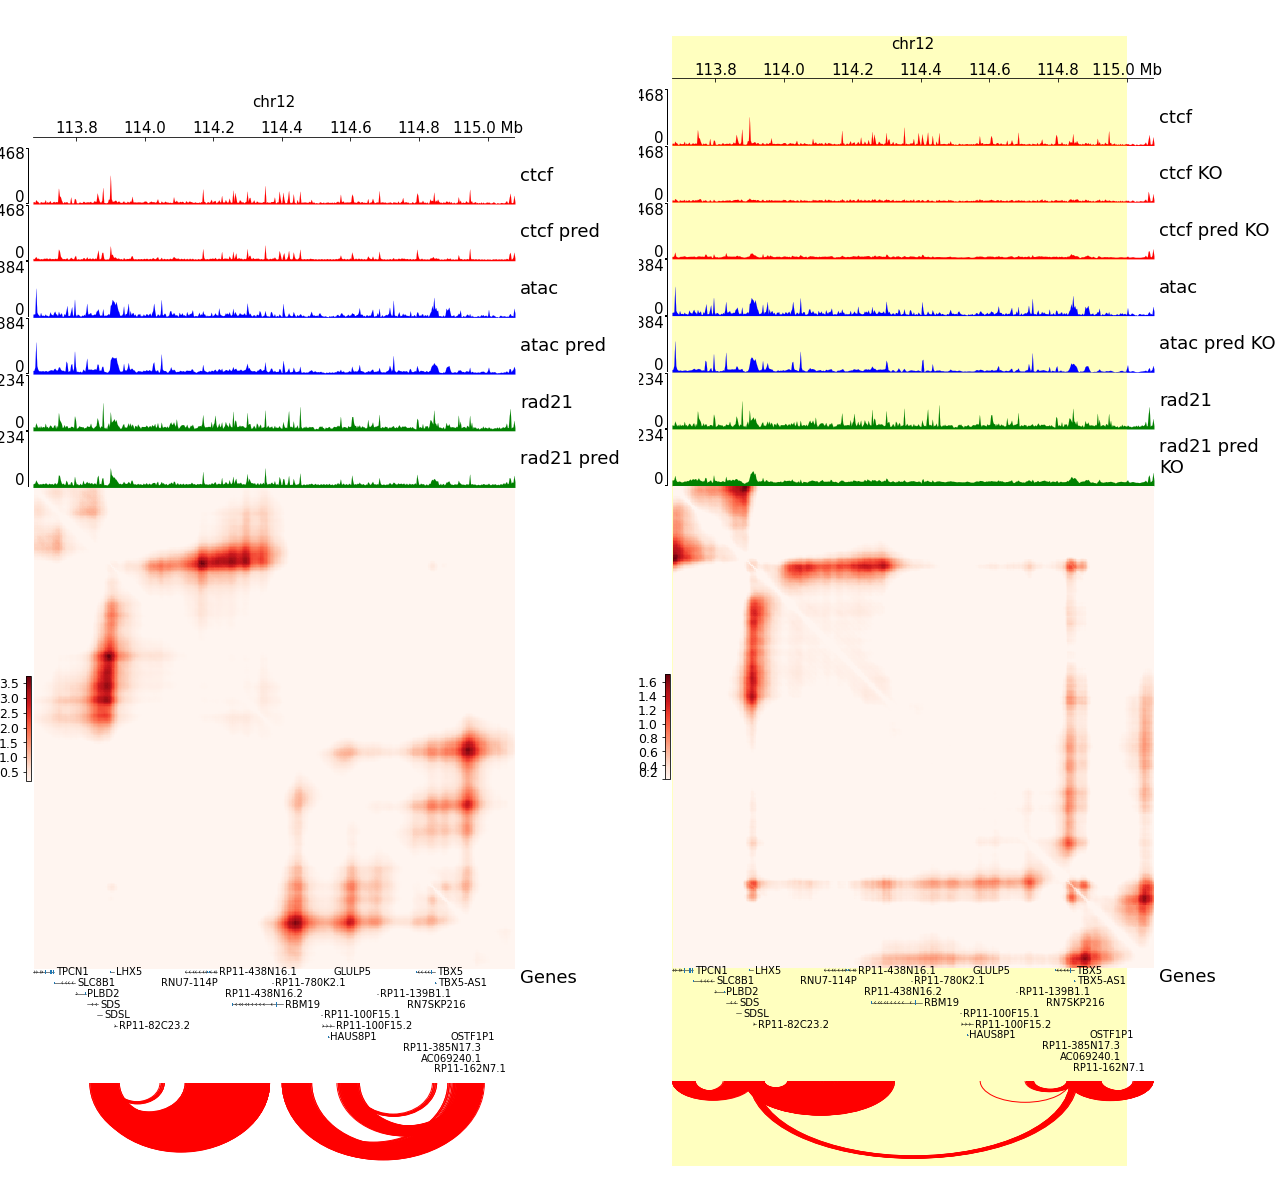

In [12]:
display_images(f'outputs/ctcf_only_hESC_WT_5kb_norm_{chrom}_{start}_ctcf_pred_tracks.png', 
               f'outputs/ctcf_only_hESC_WT_5kb_norm_{chrom}_{start}_ctcf_ko_tracks.png')

In [13]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_5kb_norm \
    --outname ctcf_seq_shuffle \
    --chr $chrom \
    --start $start \
    --model /mnt/jinstore/JinLab02/dmp131/C.Shark/checkpoints/deeploop_hESC_CTCF_ATAC_6_1d_tracks_5kb_norm.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --matrix-size 512 \
    --resolution 4096 \
    --region $region \
    --ko-start $start $start \
    --ko-width 2000000 2000000 \
    --ko ctcf seq \
    --ko-mode knockout shuffle \
    --peak-height 0.05 \
    --min-val-pred 0.2 \
    --plot-bigwigs rad21 \
    --plot-pred-bigwigs ctcf atac rad21 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_5kb_norm/genomic_features/ctcf.bw \
              atac=../cshark_data/data/hg19/hESC_WT_5kb_norm/genomic_features/atac.bw \
    --silent

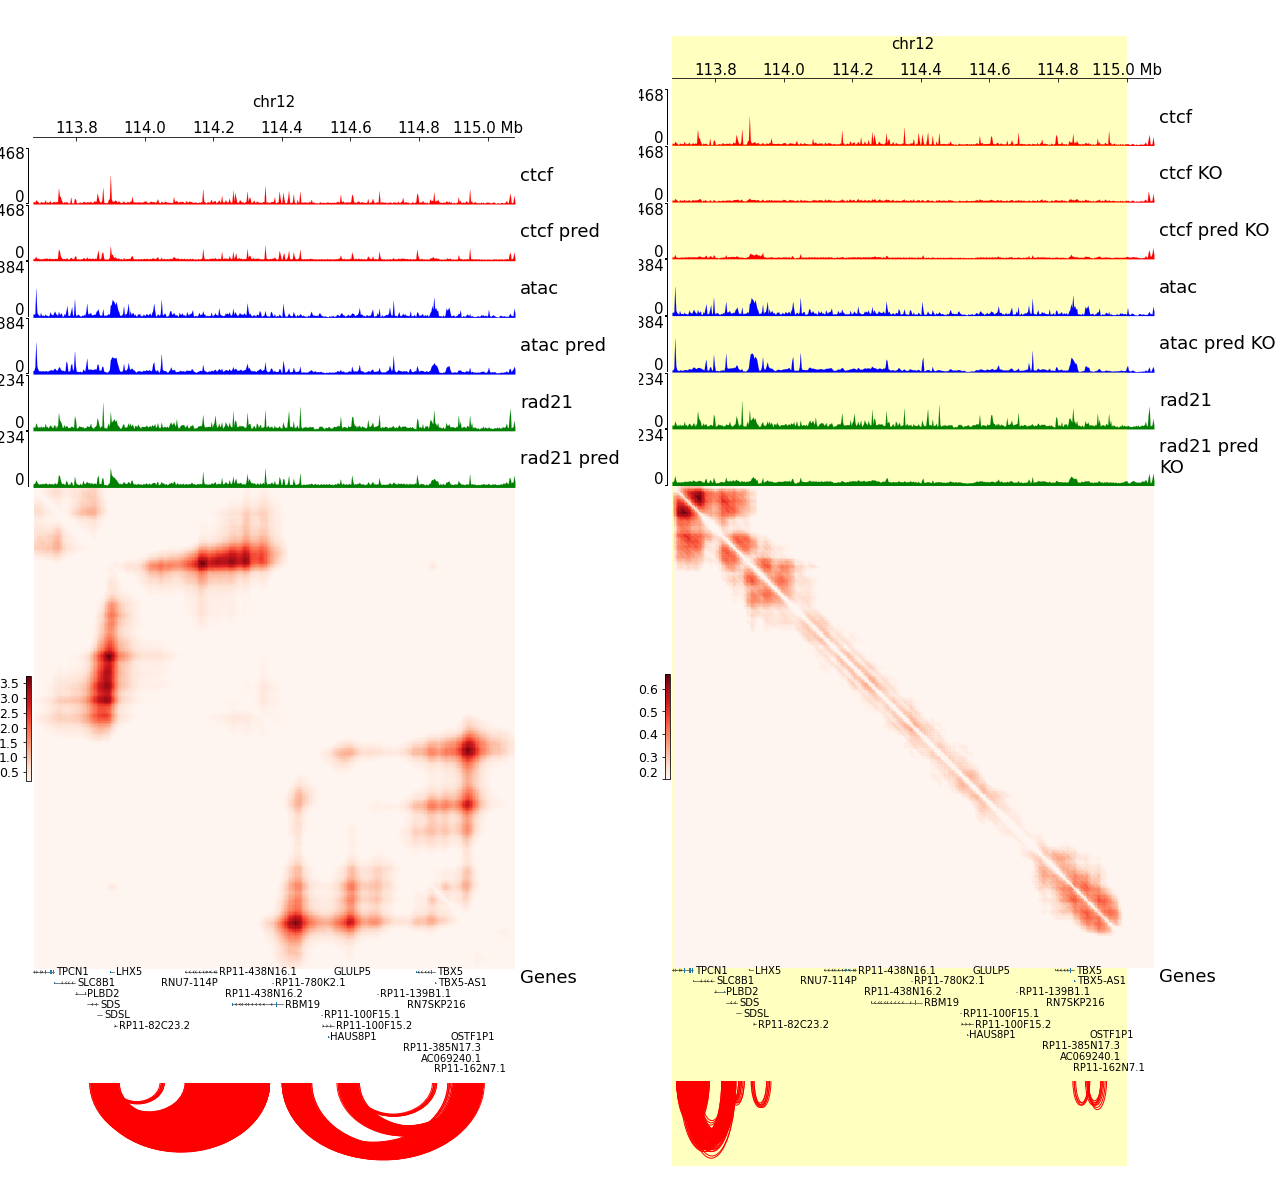

In [14]:
display_images(f'outputs/ctcf_seq_shuffle_hESC_WT_5kb_norm_{chrom}_{start}_ctcf_pred_tracks.png', 
               f'outputs/ctcf_seq_shuffle_hESC_WT_5kb_norm_{chrom}_{start}_ctcf_ko_tracks.png')

In [15]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_5kb_norm \
    --outname seq_shuffle_only \
    --chr $chrom \
    --start $start \
    --model /mnt/jinstore/JinLab02/dmp131/C.Shark/checkpoints/deeploop_hESC_CTCF_ATAC_6_1d_tracks_5kb_norm.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --matrix-size 512 \
    --resolution 4096 \
    --region $region \
    --ko-start $start \
    --ko-width 2000000 \
    --ko seq \
    --ko-mode shuffle \
    --peak-height 0.05 \
    --min-val-pred 0.2 \
    --plot-bigwigs rad21 \
    --plot-pred-bigwigs ctcf atac rad21 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_5kb_norm/genomic_features/ctcf.bw \
              atac=../cshark_data/data/hg19/hESC_WT_5kb_norm/genomic_features/atac.bw \
    --silent

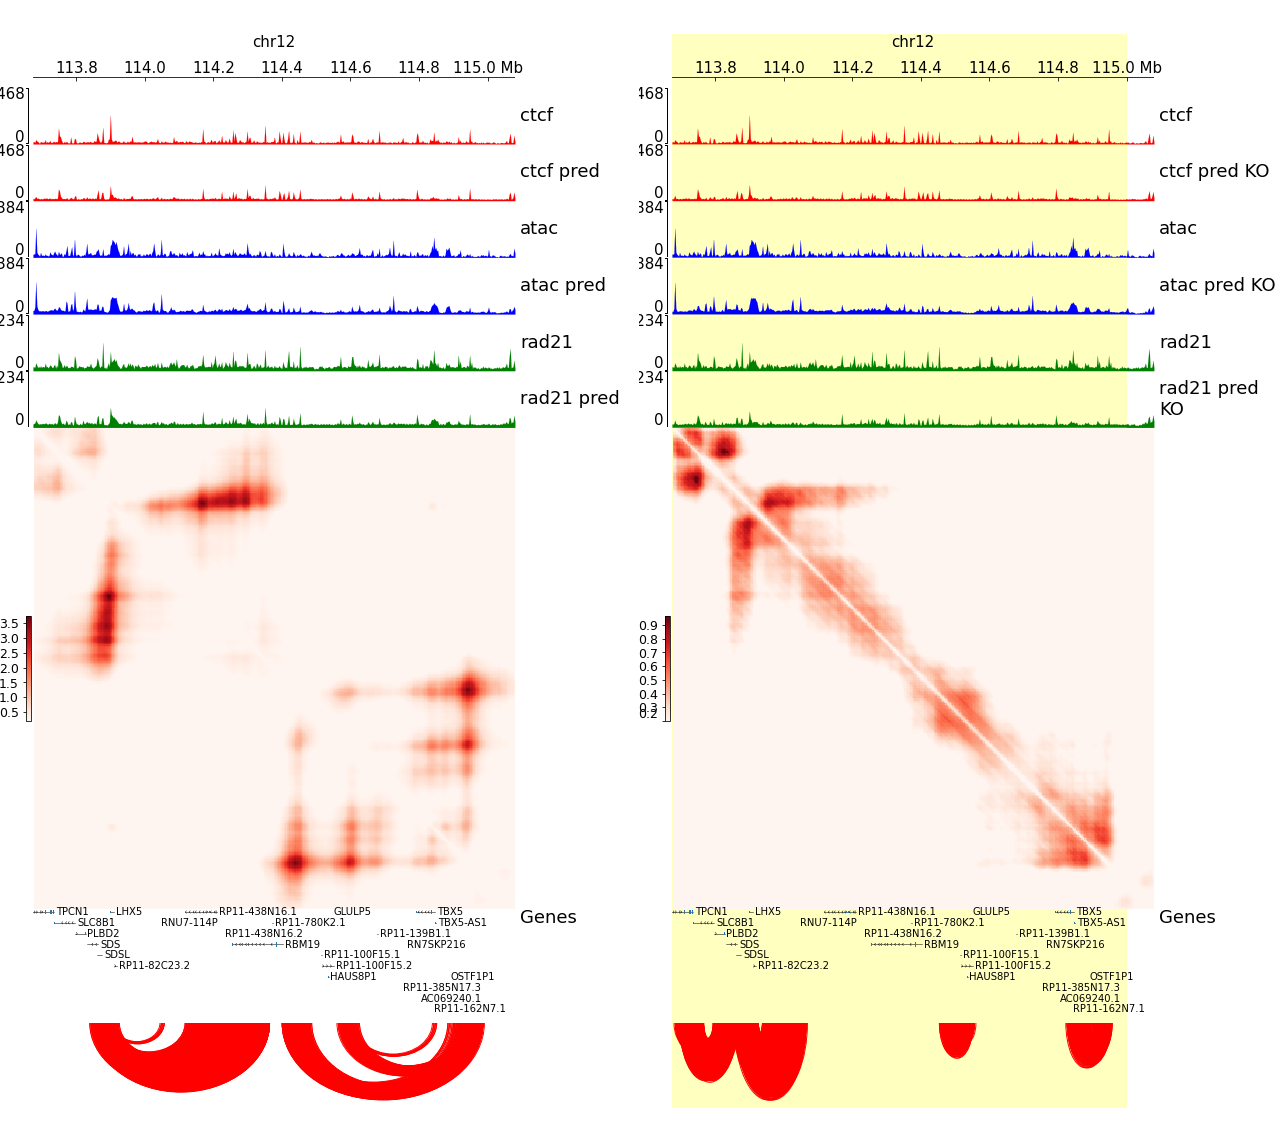

In [16]:
display_images(f'outputs/seq_shuffle_only_hESC_WT_5kb_norm_{chrom}_{start}_ctcf_pred_tracks.png', 
               f'outputs/seq_shuffle_only_hESC_WT_5kb_norm_{chrom}_{start}_ctcf_ko_tracks.png')